# Mobject 基础知识

In [1]:
from manim import *
config.media_embed = True

Manim Community v0.17.3

In [2]:
#ignore this cell, only for setup
param = "-v WARNING -r 500,100 -s  --disable_caching Example"
parambigger = "-v WARNING -r 500,120 -s  --disable_caching Example"

## 定位
### 设置位置

In [3]:
dORIGIN= Dot(color= BLUE,radius=0.5)

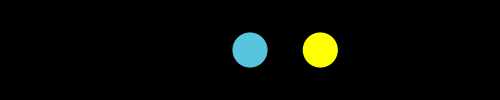

In [4]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW, radius=0.5)
        d.shift(2*RIGHT)
        self.add(dORIGIN, d)

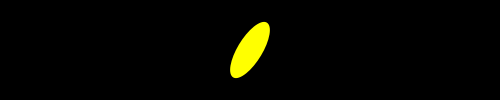

In [4]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        d.apply_matrix([[0.5, 0.5, 0], # shear matrix
                        [ 0 ,  1 , 0],
                        [ 0 ,  0 , 1]])
        self.add(d)

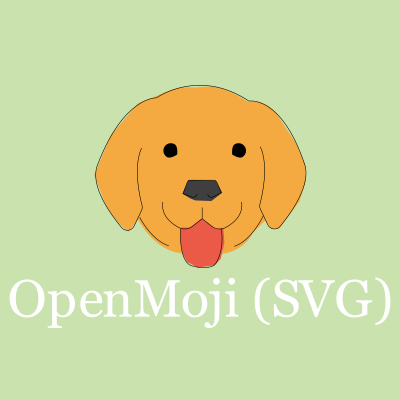

In [6]:
%%manim -v WARNING --disable_caching -qm -r400,400 Example1

from manim import *
from PIL import Image
import numpy as np
import urllib.request
from pathlib import Path


class EmojiSVGMobject(SVGMobject):
    def __init__(self, emoji, **kwargs):
        emoji_code = "-".join(f"{ord(c):x}" for c in emoji)
        emoji_code = emoji_code.upper()  # <-  needed for openmojis
        url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/svg/{emoji_code}.svg"
        path_svg = Path.cwd() / f"{emoji_code}.svg"
        urllib.request.urlretrieve(url, path_svg)
        SVGMobject.__init__(self, str(path_svg), **kwargs)
        path_svg.unlink()  # delete downloaded svg again locally


class Example1(Scene):
    def construct(self):
        self.camera.background_color = GREEN_A
        em = EmojiSVGMobject("🐶").scale(2.5)
        t = Text("OpenMoji (SVG)").scale(2)
        Group(em, t).arrange(DOWN).scale(1.4)
        self.add(em, t)